# Welcome to the Tutorial: **Clone Your Voice**
This meterial is a Tutorial part of

**Assignment 1:** Human Voice Cloning AI for Game Development: Technology, Usage, Ethic and Tutorial

**Course:** CS4386 AI Game, Programming, 2023-2024 Semester B, City University of Hong Kong

**Course Instructor:** Prof. LEUNG Wing Ho Howard (梁永豪)

*By*

**Student Name:** Maitree HIRUNTEEYAKUL  

**Student ID:** 56708629 (mhiruntee2)

**Email:** Matt.H@my.cityu.edu.hk



---

### **How to start?**
Start By Open This notebook in Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/H11Maitree/Human-Voice-Cloning-AI-for-Game-Development/blob/main/Tutorial_Clone_Your_Voice.ipynb)

Link: (https://colab.research.google.com/github/H11Maitree/Human-Voice-Cloning-AI-for-Game-Development/blob/main/Tutorial_Clone_Your_Voice.ipynb)[https://colab.research.google.com/github/H11Maitree/Human-Voice-Cloning-AI-for-Game-Development/blob/main/Tutorial_Clone_Your_Voice.ipynb]

---

**Goal:** To understand the fundametal process of Voice Cloning. At the end the of this tutorial, user should be-able to clone their own voice and generate Text-To-Speech using their own cloned voice.

### The code is based on:
- [CorentinJ/Real-Time-Voice-Cloning](https://github.com/CorentinJ/Real-Time-Voice-Cloning.git)
- [Transfer Learning from Speaker Verification to
Multispeaker Text-To-Speech Synthesis, Google Research](https://arxiv.org/abs/1806.04558)


#### Spacial Thanks:
This tutorial is heavily rely/follow on [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks) which well documented on how to excute [CorentinJ/Real-Time-Voice-Cloning](https://github.com/CorentinJ/Real-Time-Voice-Cloning.git) with custom tool for uploading and recording with-in colab.

Without this work, it would not be seamless for learner of this tutorial to follow and excute as it will invlove more robust way to handle the file recoding and uploading. Eventhough, the original tugstugi's are not comply with the current version of `Colab 2024` anymore but it still lead to the right direction for this tutorial.

In [ ]:
#@title # Review this video from CorentinJ demonstrate the Toolbox GUI version of his project
#@markdown This video should give you preperation for understanding the rest of our tutorial

from IPython.display import HTML

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/-O_hYhToKoA?si=-RSso_tnuVpf9KKc" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

In [ ]:
#@title # Install Requirement Modules
#@markdown ## List of Requrements
#@markdown ----
#@markdown #### **[IMPORTANT]:** While installing these module there maybe the pop-up ask to restart the runtime, **DO NOT RESTART**, DISMISS and WAIT all the module finish install, We will restart the runtime once after this cell is complete.
#@markdown ----
#@markdown ### Requrements That Need to be install:
#@markdown * **inflect**: A library to correctly generate plurals, singular nouns, ordinals, indefinite articles, and convert numbers to words.
#@markdown * **librosa**: A Python package for music and audio analysis, providing the building blocks necessary to create music information retrieval systems.
#@markdown * **Pillow**: The Python Imaging Library (PIL) adds image processing capabilities to your Python interpreter, including support for opening, manipulating, and saving many different image file formats.
#@markdown * **PyQt5**: A set of Python bindings for the Qt application framework, allowing you to create cross-platform software with a native UI.
#@markdown * **scikit-learn**: A machine learning library for Python, featuring various classification, regression and clustering algorithms, including support vector machines, random forests, and k-means.
#@markdown * **scipy**: An open-source Python library used for scientific and technical computing, which includes modules for optimization, linear algebra, integration, interpolation, special functions, FFT, and more.
#@markdown * **sounddevice**: A module that provides bindings for the PortAudio library and a convenient interface to play and record sound using NumPy arrays.
#@markdown * **SoundFile**: A Python library for reading from and writing to audio files, such as WAV, FLAC, or AIFF, with a simple and easy-to-use interface.
#@markdown * **tqdm**: A fast, extensible progress bar for Python and CLI that can wrap iterable objects or be manually updated.
#@markdown * **umap-learn**: An implementation of UMAP (Uniform Manifold Approximation and Projection), a dimensionality reduction technique that is typically used for visualization in the same vein as t-SNE.
#@markdown * **Unidecode**: A Python module that helps to transliterate any Unicode string into the closest possible representation in ASCII text.
#@markdown * **urllib3**: A powerful, user-friendly HTTP client for Python, used for making requests to web servers, handling cookies, and managing SSL and proxies.
#@markdown * **visdom**: A flexible tool for creating, organizing, and sharing visualizations of live, rich data, supporting PyTorch and Numpy.
#@markdown * **webrtcvad**: A Python interface to the WebRTC Voice Activity Detector (VAD), used to detect voice activity in audio streams.

#@markdown ### Requrements That already pre-installed in Google Colab:
#@markdown * **matplotlib**: A comprehensive library for creating static, animated, and interactive visualizations in Python.
#@markdown * **numpy**: A fundamental package for scientific computing with Python, providing support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

!pip install inflect==5.3.0
!pip install librosa==0.8.1
!pip install Pillow==8.4.0
!pip install PyQt5==5.15.6
!pip install scikit-learn==1.0.2
!pip install scipy==1.7.3
!pip install sounddevice==0.4.3
!pip install SoundFile==0.10.3.post1
!pip install tqdm==4.62.3
!pip install umap-learn==0.5.2
!pip install Unidecode==1.3.2
!pip install urllib3==1.26.7
!pip install visdom==0.1.8.9
!pip install webrtcvad==2.0.10

# Restart The Runtime **[Important]**
Before we move on to the next cell, as we previously install some dependency into the system **we need to restart it for the Runtime to be reconize those library**. Otherwise it will not beable to run.

## How to Restart the Runtime?
restart your Google Colab runtime by going to **'`Runtime`' > '`Restart runtime`** or **`Restart session`'**

In [ ]:
#@title Clone the Code from CorentinJ (Voice Generation) and tugstugi (colab widgets)
#@markdown Now we need to clone the nessesary code for:
#@markdown - Voice Cloning: [CorentinJ/Real-Time-Voice-Cloning](https://github.com/CorentinJ/Real-Time-Voice-Cloning.git)
#@markdown - CoLab tools (for upload/record voice widget in colab): [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks/archive/colab_utils.zip)

import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/CorentinJ/Real-Time-Voice-Cloning.git'
project_name = splitext(basename(git_repo_url))[0] # Extract Project Name

# Check if the Repository is not yet initialize
if not exists(project_name):

  # Clone the CorentinJ/Real-Time-Voice-Cloning repository
  !git clone -q --recursive {git_repo_url}

  # install dependencies
  !cd {project_name}
  !pip install -q --upgrade gdown
  !apt-get install -qq libportaudio2
  !pip install -q https://github.com/tugstugi/dl-colab-notebooks/archive/colab_utils.zip # Colab Utility Tools for demonstration

  # Download Pretrained Models
  !cd {project_name} && mkdir -p saved_models/default/
  !cd {project_name}/saved_models/default/ && gdown https://drive.google.com/uc?id=1q8mEGwCkFy23KZsinbuvdKAQLqNKbYf1 # Encoder
  !cd {project_name}/saved_models/default/ && gdown https://drive.google.com/uc?id=1EqFMIbvxffxtjiVrtykroF6_mUh-5Z3s # Synthesizer
  !cd {project_name}/saved_models/default/ && gdown https://drive.google.com/uc?id=1cf2NO6FtI0jDuy8AV3Xgn6leO6dHjIgu # Vocoder

# What is Encoder, Synthesizer and Vocoder?
This is a pipeline showing how this Voice Cloning process as breakdown steps:

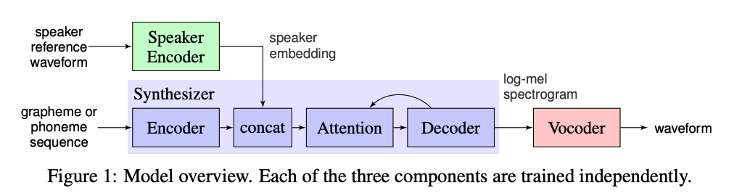

There are some terms that you might need to understand:
- **Encoder:** Transforming sound wave file (e.g. .mp3, .wav) into vector/array (embedding array for encoding speaker voice and mel spectrogram from text phoneme sequence)
- **Synthesizer:** the whole pipeline that transforms Text-To-Speech with concerted embedding (producing clone voice from text + embedding)
- **Vocoder:** transform mel spectrogram (multi-frequency array over time) into sound wave file (e.g. `.mp3`, `.wav`)


In [ ]:
#@title ## Download the Encoder, Synthesizer and Vocoder model
#@markdown Accroding to [CorentinJ/Real-Time-Voice-Cloning/wiki](https://github.com/CorentinJ/Real-Time-Voice-Cloning/wiki/Pretrained-models) we need to have these pretrain models: Encoder, Synthesizer and Vocoder to make it work.

import sys
sys.path.append(project_name)

from IPython.display import display, Audio, clear_output
from IPython.utils import io
import ipywidgets as widgets
import numpy as np

from dl_colab_notebooks.audio import record_audio, upload_audio, audio_bytes_to_np

from synthesizer.inference import Synthesizer
from encoder import inference as encoder
from vocoder import inference as vocoder
from pathlib import Path

encoder.load_model(project_name / Path("saved_models/default/encoder.pt")) # Load Encoder
synthesizer = Synthesizer(project_name / Path("saved_models/default/synthesizer.pt")) # Load Synthesizer
vocoder.load_model(project_name / Path("saved_models/default/vocoder.pt")) # Load Vocoder

In [ ]:
#@title Record or Upload
#@markdown Now, either record your voice from microphone or upload audio from file (.mp3 or .wav) to create embedding.

#@markdown You may **speak anything**, just speak on the recording, utill the recording is finished.

#@markdown If you don't have any thing to speak, **try introduce yourself**!

#@markdown After finish, play your recording to make sure the Sound is good for encoding.

SAMPLE_RATE = 22050 # rate of the sound file
record_or_upload = "Record" #@param ["Record", "Upload (.mp3 or .wav)"]
record_seconds =   10 #@param {type:"number", min:1, max:10, step:1}

embedding = None
def _compute_embedding(audio):
  display(Audio(audio, rate=SAMPLE_RATE, autoplay=False))
  global embedding
  embedding = None
  embedding = encoder.embed_utterance(encoder.preprocess_wav(audio, SAMPLE_RATE))
def _record_audio(b):
  clear_output()
  audio = record_audio(record_seconds, sample_rate=SAMPLE_RATE)
  _compute_embedding(audio)
def _upload_audio(b):
  clear_output()
  audio = upload_audio(sample_rate=SAMPLE_RATE)
  _compute_embedding(audio)

if record_or_upload == "Record":
  button = widgets.Button(description="Record Your Voice")
  button.on_click(_record_audio)
  display(button)
else:
  button = widgets.Button(description="Upload Voice File")
  button.on_click(_upload_audio)
  display(button)

In [ ]:
#@title # Generate the Cloned Voice From Text (Text-To-Speach + Encoding)

#@markdown Now, you got your embedding in-place, we can start generate the cloned voice given the speech.

#@markdown **Inputting the sentence you want to generate and run the cell.**

#@markdown After the cell run is complete you should be-able to **play the Cloned Voice**

text = "This is my cloned voice" #@param {type:"string"}

def synthesize(embed, text):
  print("Generating the Cloned Voice From the Given Text")
  specs = synthesizer.synthesize_spectrograms([text], [embed])
  generated_wav = vocoder.infer_waveform(specs[0])
  generated_wav = np.pad(generated_wav, (0, synthesizer.sample_rate), mode="constant")
  clear_output()
  display(Audio(generated_wav, rate=synthesizer.sample_rate, autoplay=True))

if embedding is None:
  print("You need to have embedding first to start generating (Record voice/uploade voice)")
else:
  synthesize(embedding, text)

In [ ]:
#@title # What's embedding looks like?
#@markdown **Embedding** is a **Voice Verification ID** which meant to be uniqe per Voice (person), it **represent the quality of the Human sound**. The embedding can be represent by the **array of float**.
#@markdown Another popular usecase of Voice embedding is to verify indentity of the user in phone banking like [HSBC's Voice ID](https://www.hsbc.com.hk/ways-to-bank/phone/voice-id/)
embedding

In [ ]:
#@title ## Visualize the embedding
#@markdown **Embedding** can be visualize in the form of **heatmap** for convienet of understanding
encoder.plot_embedding_as_heatmap(embedding)

In [ ]:
#@title # Save and Load Embedding

import numpy as np

def saveToDisk(array: np.ndarray, dest: str) -> None:
    """
    Save a numpy array to disk as a .npy binary file.

    :param array: The numpy array to save.
    :param dest: Destination file path where the array will be saved.
    """
    np.save(dest, array)

def loadFromDisk(src: str) -> np.ndarray:
    """
    Load a numpy array from a .npy binary file.

    :param src: Source file path from which to load the array.
    :return: The loaded numpy array.
    """
    return np.load(src)

In [ ]:
#@title ## Save Current Embedding
#@markdown We can now save the embedding array to the file I/O

#@markdown **Tips:** In Colab File I/O is accessable from the left-hand-side menu under icon file

#@markdown You may need to open the Colab's File exporer to see the file in the runtime, upload and dowload file.

actorName = input("Whose voice is this?: ")
saveToDisk(embedding, f'./{actorName}-voice.npy')

In [ ]:
#@title ## Load Embedding From I/O
actorName = input("Whose voice you want to load?: ")
embedding = loadFromDisk(f'./{actorName}-voice.npy')



---


# **Extra:** Generate Hong Kong MTR Voice
Next Station, Kowloon Tong", the common sound that people CityU have to hear everyday when taking MTR to/from the campus.

Today, we will extract the embedding out of the MTR voice and recrate voice for a new station stop

**Disclamer: DO NOT Pubish this MTR Cloned Voice and use it for educationnal purpose under this tutorial only.**

In [35]:
#@title ## Meet the MTR Voice
#@markdown Introducing *Dr. Cheri CHAN Yu Yan* From Faculty of Education, HKU whose is the voice of MTR.
#@markdown **Review:** Dr. Cheri's interview about 'voice of MTR' with South China Morning Post

#@markdown [Voice of Hong Kong's MTR | South China Morning Post](https://www.facebook.com/plugins/video.php?height=314&href=https%3A%2F%2Fwww.facebook.com%2Fscmp%2Fvideos%2F10153769507224820%2F&show_text=false&width=560&t=0)

from IPython.display import HTML

HTML('<iframe src="https://www.facebook.com/plugins/video.php?height=314&href=https%3A%2F%2Fwww.facebook.com%2Fscmp%2Fvideos%2F10153769507224820%2F&show_text=false&width=560&t=0" width="560" height="314" style="border:none;overflow:hidden" scrolling="no" frameborder="0" allowfullscreen="true" allow="autoplay; clipboard-write; encrypted-media; picture-in-picture; web-share" allowFullScreen="true"></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [ ]:
#@title ## Get the MTR Voice Sample

#@markdown Now I have prepared the sample of her voice from the video above, let's load it up.

# Dowload the sound sample from GitHub
!wget https://github.com/H11Maitree/Human-Voice-Cloning-AI-for-Game-Development/raw/main/assets/Voice-of-HK-MTR.mp3


# Load
with open("Voice-of-HK-MTR.mp3", "rb") as file:
    audio_bytes = file.read()
audio = audio_bytes_to_np(audio_bytes, sample_rate=22050)
_compute_embedding(audio)

In [ ]:
#@title ## Visualize the MTR voice embedding
#@markdown This is the embedding (VoiceID) of Dr. Cheri, the voice of MTR HK
encoder.plot_embedding_as_heatmap(embedding)

In [ ]:
#@title # Generate the MTR Voice
#@markdown Now it time for us to generate new MTR stop!
text = "the next station   Cee Est Lab" #@param {type:"string"}
if embedding is None:
  print("You need to have embedding first to start generating (Record voice/uploade voice)")
else:
  synthesize(embedding, text)

## What's goes wrong with our MTR voice?
There are some question to takeaway?
- Why we are using `"Cee Est Lab"` but not `"CSLab"`?
- Does the Cloned MTR Voice sound like real MTR voice?
- Does British-HK accent from Dr. Cheri came along in the cloned voice? Why?
- How can we improve this? Where should we improve `Encoder`/`Synthesizer`/`Vocoder` and Why?